In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set()
%matplotlib inline

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/reniellechavez/Master2019/master/Trimestre_II/DataDrivinBusiness/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_table(url,sep=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#no missing information
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

There are categorical variables and object

In [5]:
#Checking the website: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
#We are dropping the following columns due to unnecessary information: EmployeeCount, EmployeeNumber, StandarHours, Over18
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'],inplace=True)


In [6]:
forloop = {}
for column in df:
    if column != 'EmployeeNumber' and 'MonthlyRate' and 'MonthlyIncome':
      forloop[column] = df[column].value_counts().to_dict()
forloop


{'Age': {35: 78,
  34: 77,
  31: 69,
  36: 69,
  29: 68,
  32: 61,
  30: 60,
  33: 58,
  38: 58,
  40: 57,
  37: 50,
  27: 48,
  28: 48,
  42: 46,
  39: 42,
  45: 41,
  41: 40,
  26: 39,
  46: 33,
  44: 33,
  43: 32,
  50: 30,
  24: 26,
  25: 26,
  47: 24,
  49: 24,
  55: 22,
  48: 19,
  51: 19,
  53: 19,
  52: 18,
  54: 18,
  22: 16,
  56: 14,
  58: 14,
  23: 14,
  21: 13,
  20: 11,
  59: 10,
  19: 9,
  18: 8,
  60: 5,
  57: 4},
 'Attrition': {'No': 1233, 'Yes': 237},
 'BusinessTravel': {'Travel_Rarely': 1043,
  'Travel_Frequently': 277,
  'Non-Travel': 150},
 'DailyRate': {691: 6,
  1082: 5,
  329: 5,
  1329: 5,
  530: 5,
  408: 5,
  715: 4,
  589: 4,
  906: 4,
  350: 4,
  827: 4,
  1146: 4,
  1283: 4,
  829: 4,
  688: 4,
  1125: 4,
  430: 4,
  465: 4,
  575: 4,
  147: 4,
  217: 4,
  933: 4,
  117: 4,
  427: 4,
  1490: 4,
  977: 4,
  921: 4,
  1157: 4,
  1469: 4,
  950: 4,
  267: 4,
  334: 4,
  1225: 4,
  959: 3,
  482: 3,
  192: 3,
  501: 3,
  775: 3,
  890: 3,
  970: 3,
  1180: 3,


In [ ]:
sns.pairplot(df)

In [ ]:
g = sns.pairplot(df, hue="Gender", palette="Set2", diag_kind="kde", height=2.5)

### Analysing actegorical variables

In [7]:
categorical=df.select_dtypes(include=['object'])

In [8]:
categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


Attrition- department

<function matplotlib.pyplot.show(*args, **kw)>

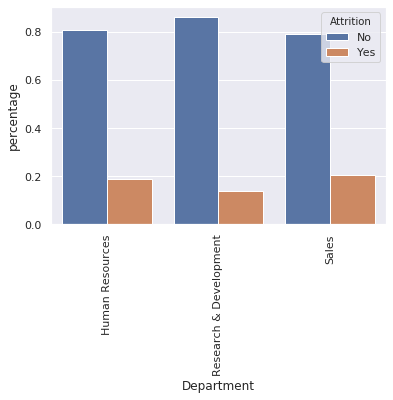

In [9]:
df_attrition_department= df[["Attrition","Department"]].groupby ("Department").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="Department", y="percentage", hue="Attrition", data=df_attrition_department) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition- BusinessTravel

<function matplotlib.pyplot.show(*args, **kw)>

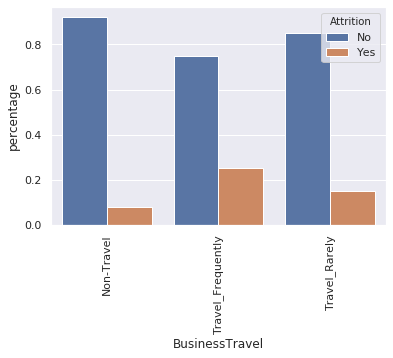

In [10]:
df_attrition_BusinessTravel= df[["Attrition","BusinessTravel"]].groupby ("BusinessTravel").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="BusinessTravel", y="percentage", hue="Attrition", data=df_attrition_BusinessTravel) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition- Gender

<function matplotlib.pyplot.show(*args, **kw)>

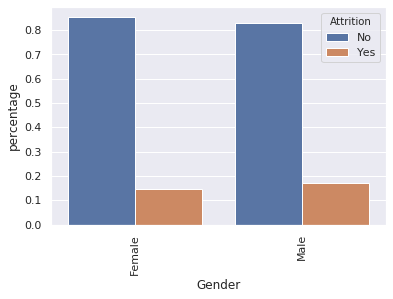

In [11]:
df_attrition_Gender= df[["Attrition","Gender"]].groupby ("Gender").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="Gender", y="percentage", hue="Attrition", data=df_attrition_Gender) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-EducationField

<function matplotlib.pyplot.show(*args, **kw)>

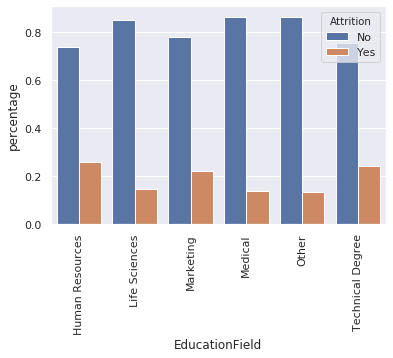

In [12]:
df_attrition_EducationField= df[["Attrition","EducationField"]].groupby ("EducationField").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="EducationField", y="percentage", hue="Attrition", data=df_attrition_EducationField) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-JobRole

<function matplotlib.pyplot.show(*args, **kw)>

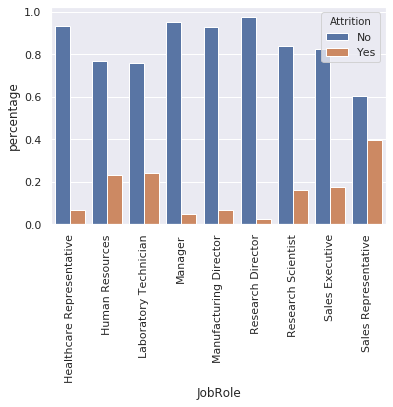

In [13]:
df_attrition_JobRole= df[["Attrition","JobRole"]].groupby("JobRole").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="JobRole", y="percentage", hue="Attrition", data=df_attrition_JobRole) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-MaritalStatus

<function matplotlib.pyplot.show(*args, **kw)>

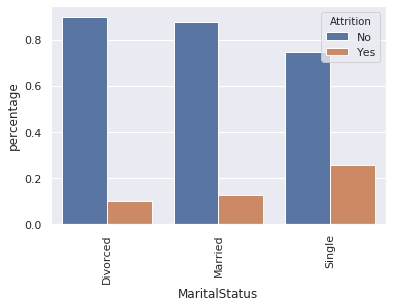

In [14]:
df_attrition_MaritalStatus= df[["Attrition","MaritalStatus"]].groupby ("MaritalStatus").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="MaritalStatus", y="percentage", hue="Attrition", data=df_attrition_MaritalStatus) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-OverTime

<function matplotlib.pyplot.show(*args, **kw)>

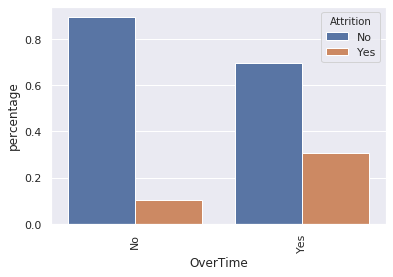

In [15]:
df_attrition_OverTime= df[["Attrition","OverTime"]].groupby ("OverTime").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="OverTime", y="percentage", hue="Attrition", data=df_attrition_OverTime) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

In [16]:
# Sales representative
df_sales=df.loc[df['JobRole'] == "Manager"]
df_sales.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,Female,...,3,3,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,3,Female,...,3,4,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,2,Female,...,3,4,0,22,2,2,2,2,2,1
65,55,No,Travel_Rarely,836,Research & Development,8,3,Medical,4,Female,...,3,3,3,21,2,3,5,0,0,2
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,3,Female,...,4,4,1,30,3,3,3,2,2,2
112,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,4,Female,...,3,3,0,23,3,3,5,3,4,4
116,34,No,Travel_Rarely,1354,Research & Development,5,3,Medical,3,Female,...,3,4,0,14,6,3,11,10,5,8
119,43,No,Travel_Frequently,394,Sales,26,2,Life Sciences,3,Male,...,3,4,2,25,3,4,25,12,4,12
147,41,No,Travel_Frequently,857,Research & Development,10,3,Life Sciences,4,Male,...,3,2,1,21,2,2,7,6,7,7
165,50,No,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,3,Female,...,3,2,0,21,5,3,5,4,4,4


In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


dict = {"Female": 1, "Male": 0}
df1 = df.replace({"Gender": dict})

dict = {"Yes": 1, "No": 0}
df1 = df.replace({"Attrition": dict})

dict = {"Life Sciences": 0, "Other": 1, "Research & Development":2, ""}
df1 = df.replace({"EducationalField": dict})

type(df.Gender)

results_sales = smf.ols('Attrition ~ Gender + BusinessTravel + DistanceFromHome + JobLevel + EducationField + EnvironmentSatisfaction', data=df).fit()
print(results_sales.summary())

df.info()

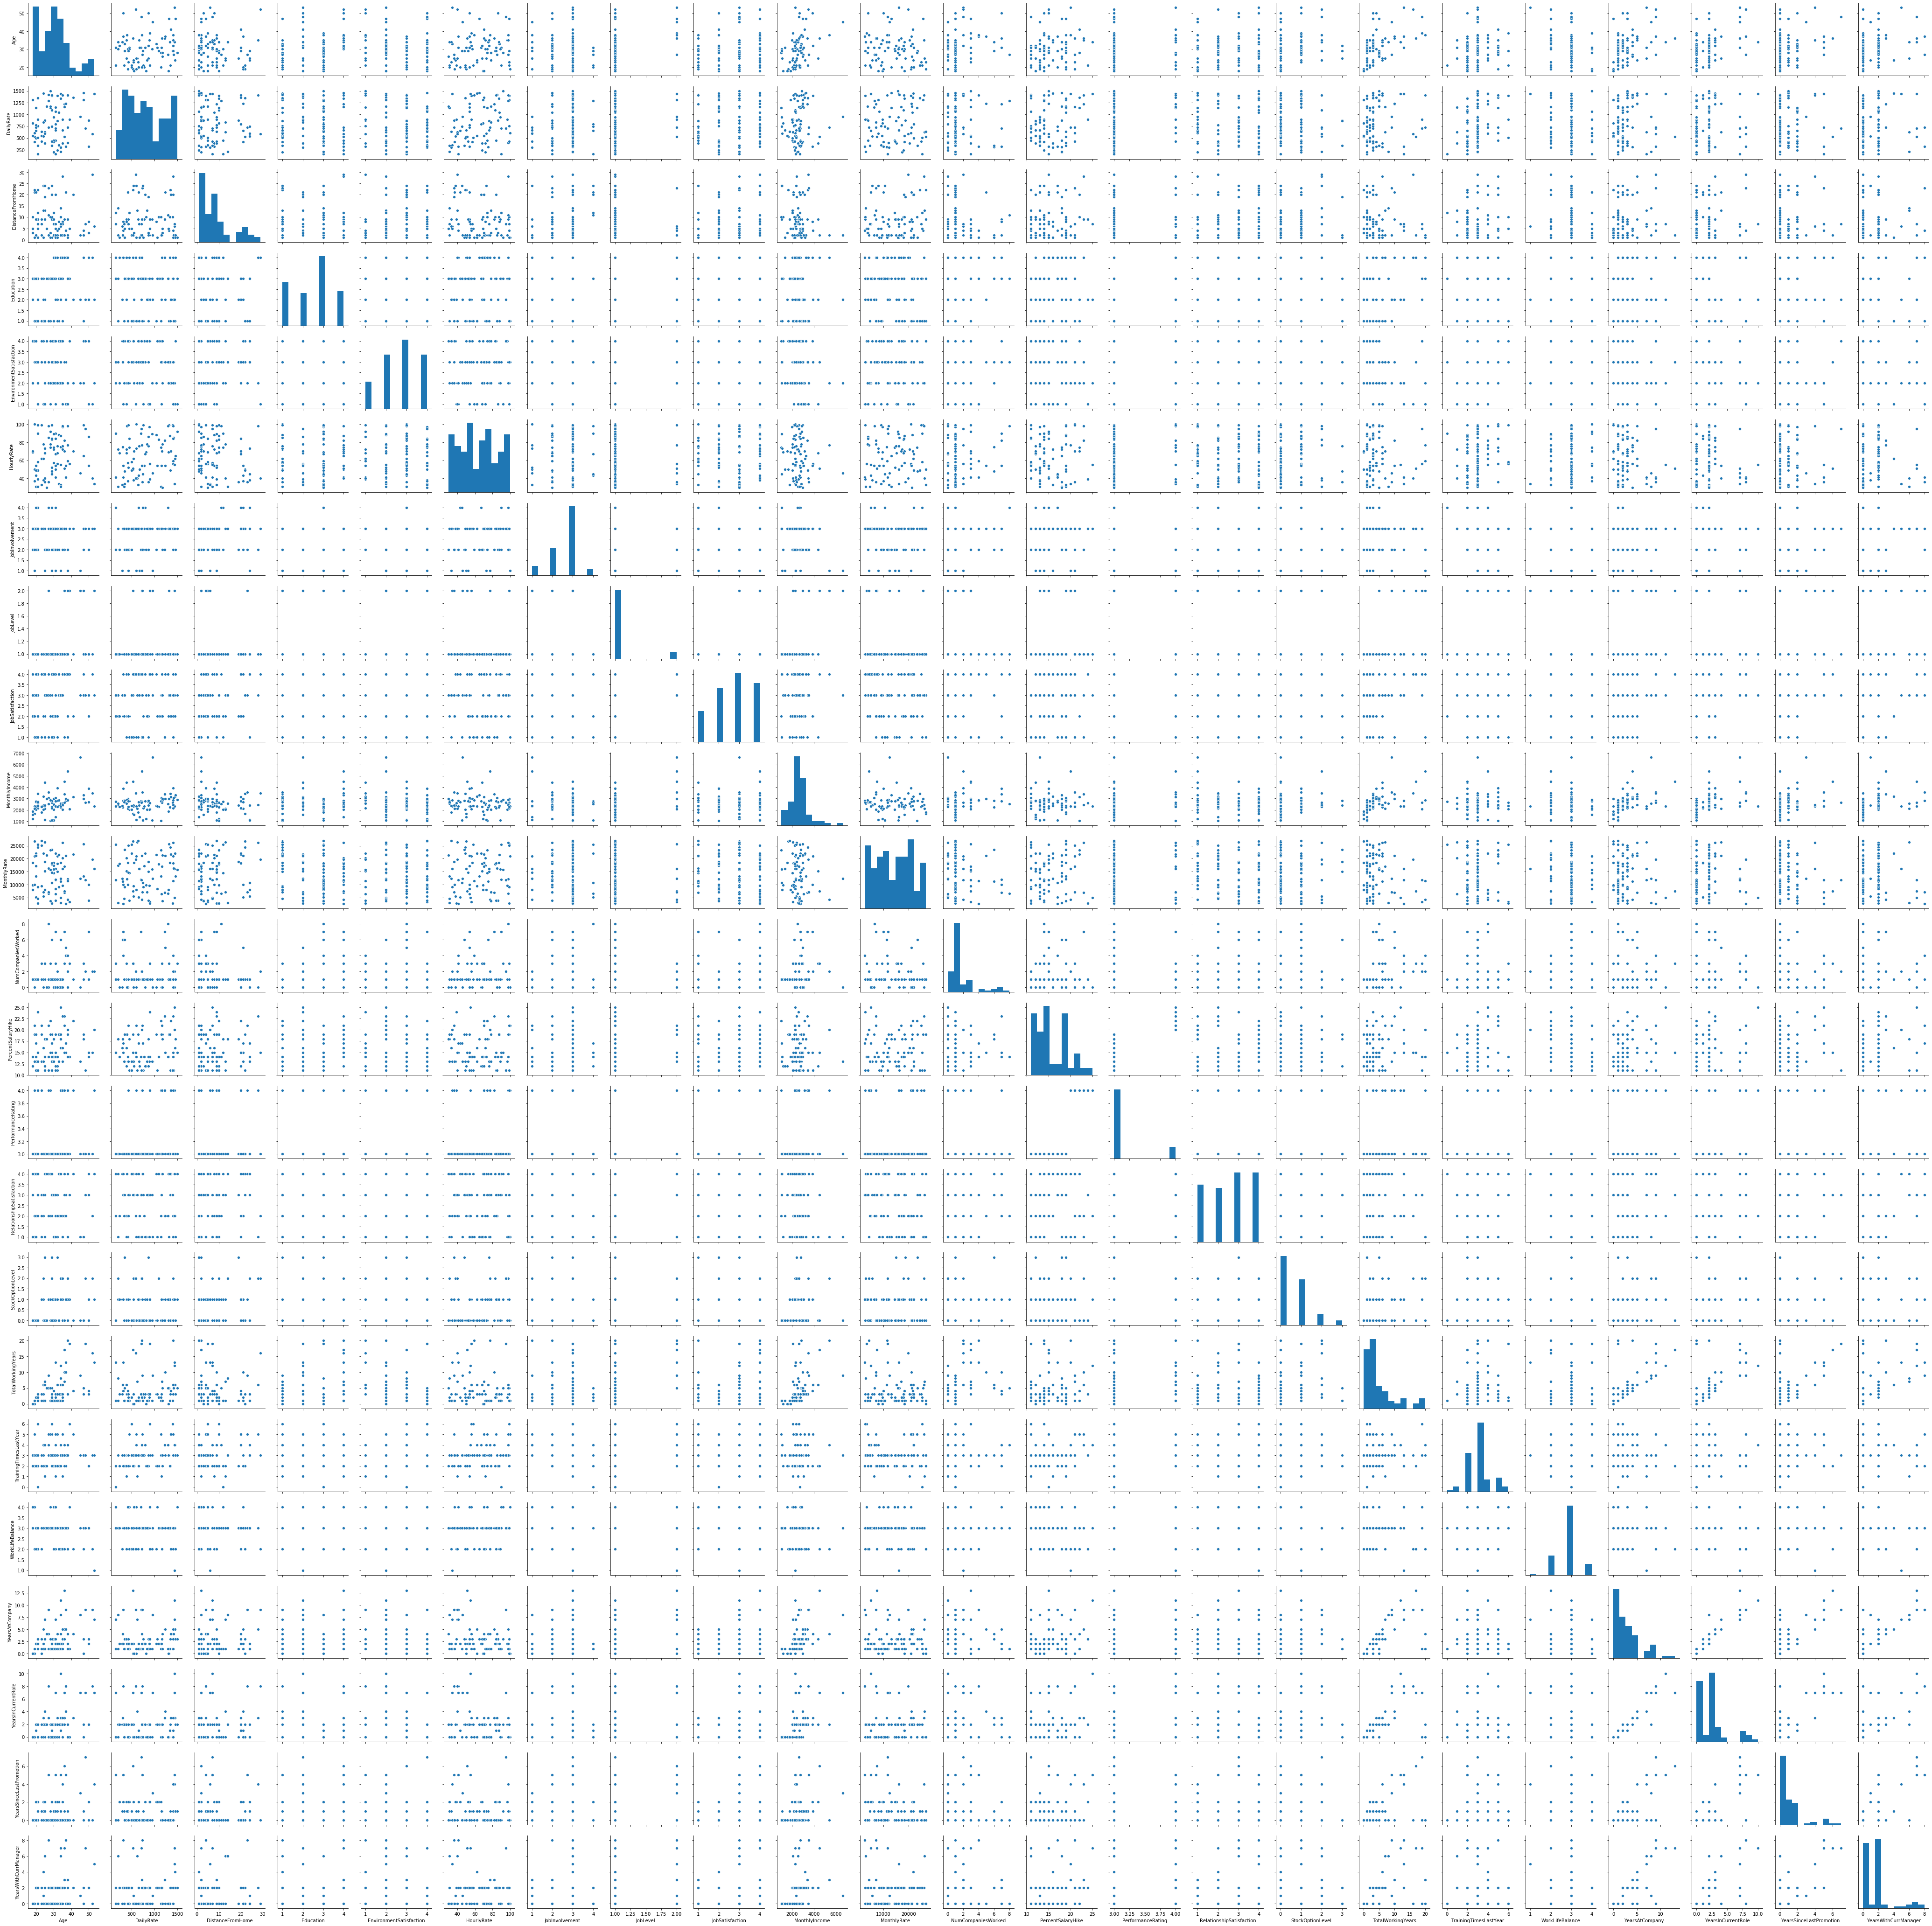

In [13]:
sns.pairplot(df_sales)

In [18]:
df = pd.get_dummies(df, columns=['BusinessTravel','Department', "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"],drop_first=True)
df.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1


In [19]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null object
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition',axis=1), 
                                                    df['Attrition'], test_size=0.30, 
                                                    random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/francesca/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
predictions

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No